In [7]:
import numpy as np
import pandas as pd
import sklearn.datasets as dt

In [8]:
data = dt.load_boston()
(_, results) = dt.load_boston(True)
# for details see https://scikit-learn.org/stable/datasets/index.html#boston-dataset
type(data)

sklearn.utils.Bunch

In [9]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
pdData = pd.DataFrame(data=data.data, columns=data.feature_names)
pdData["price"] = results
pdData.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [11]:
pdData.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

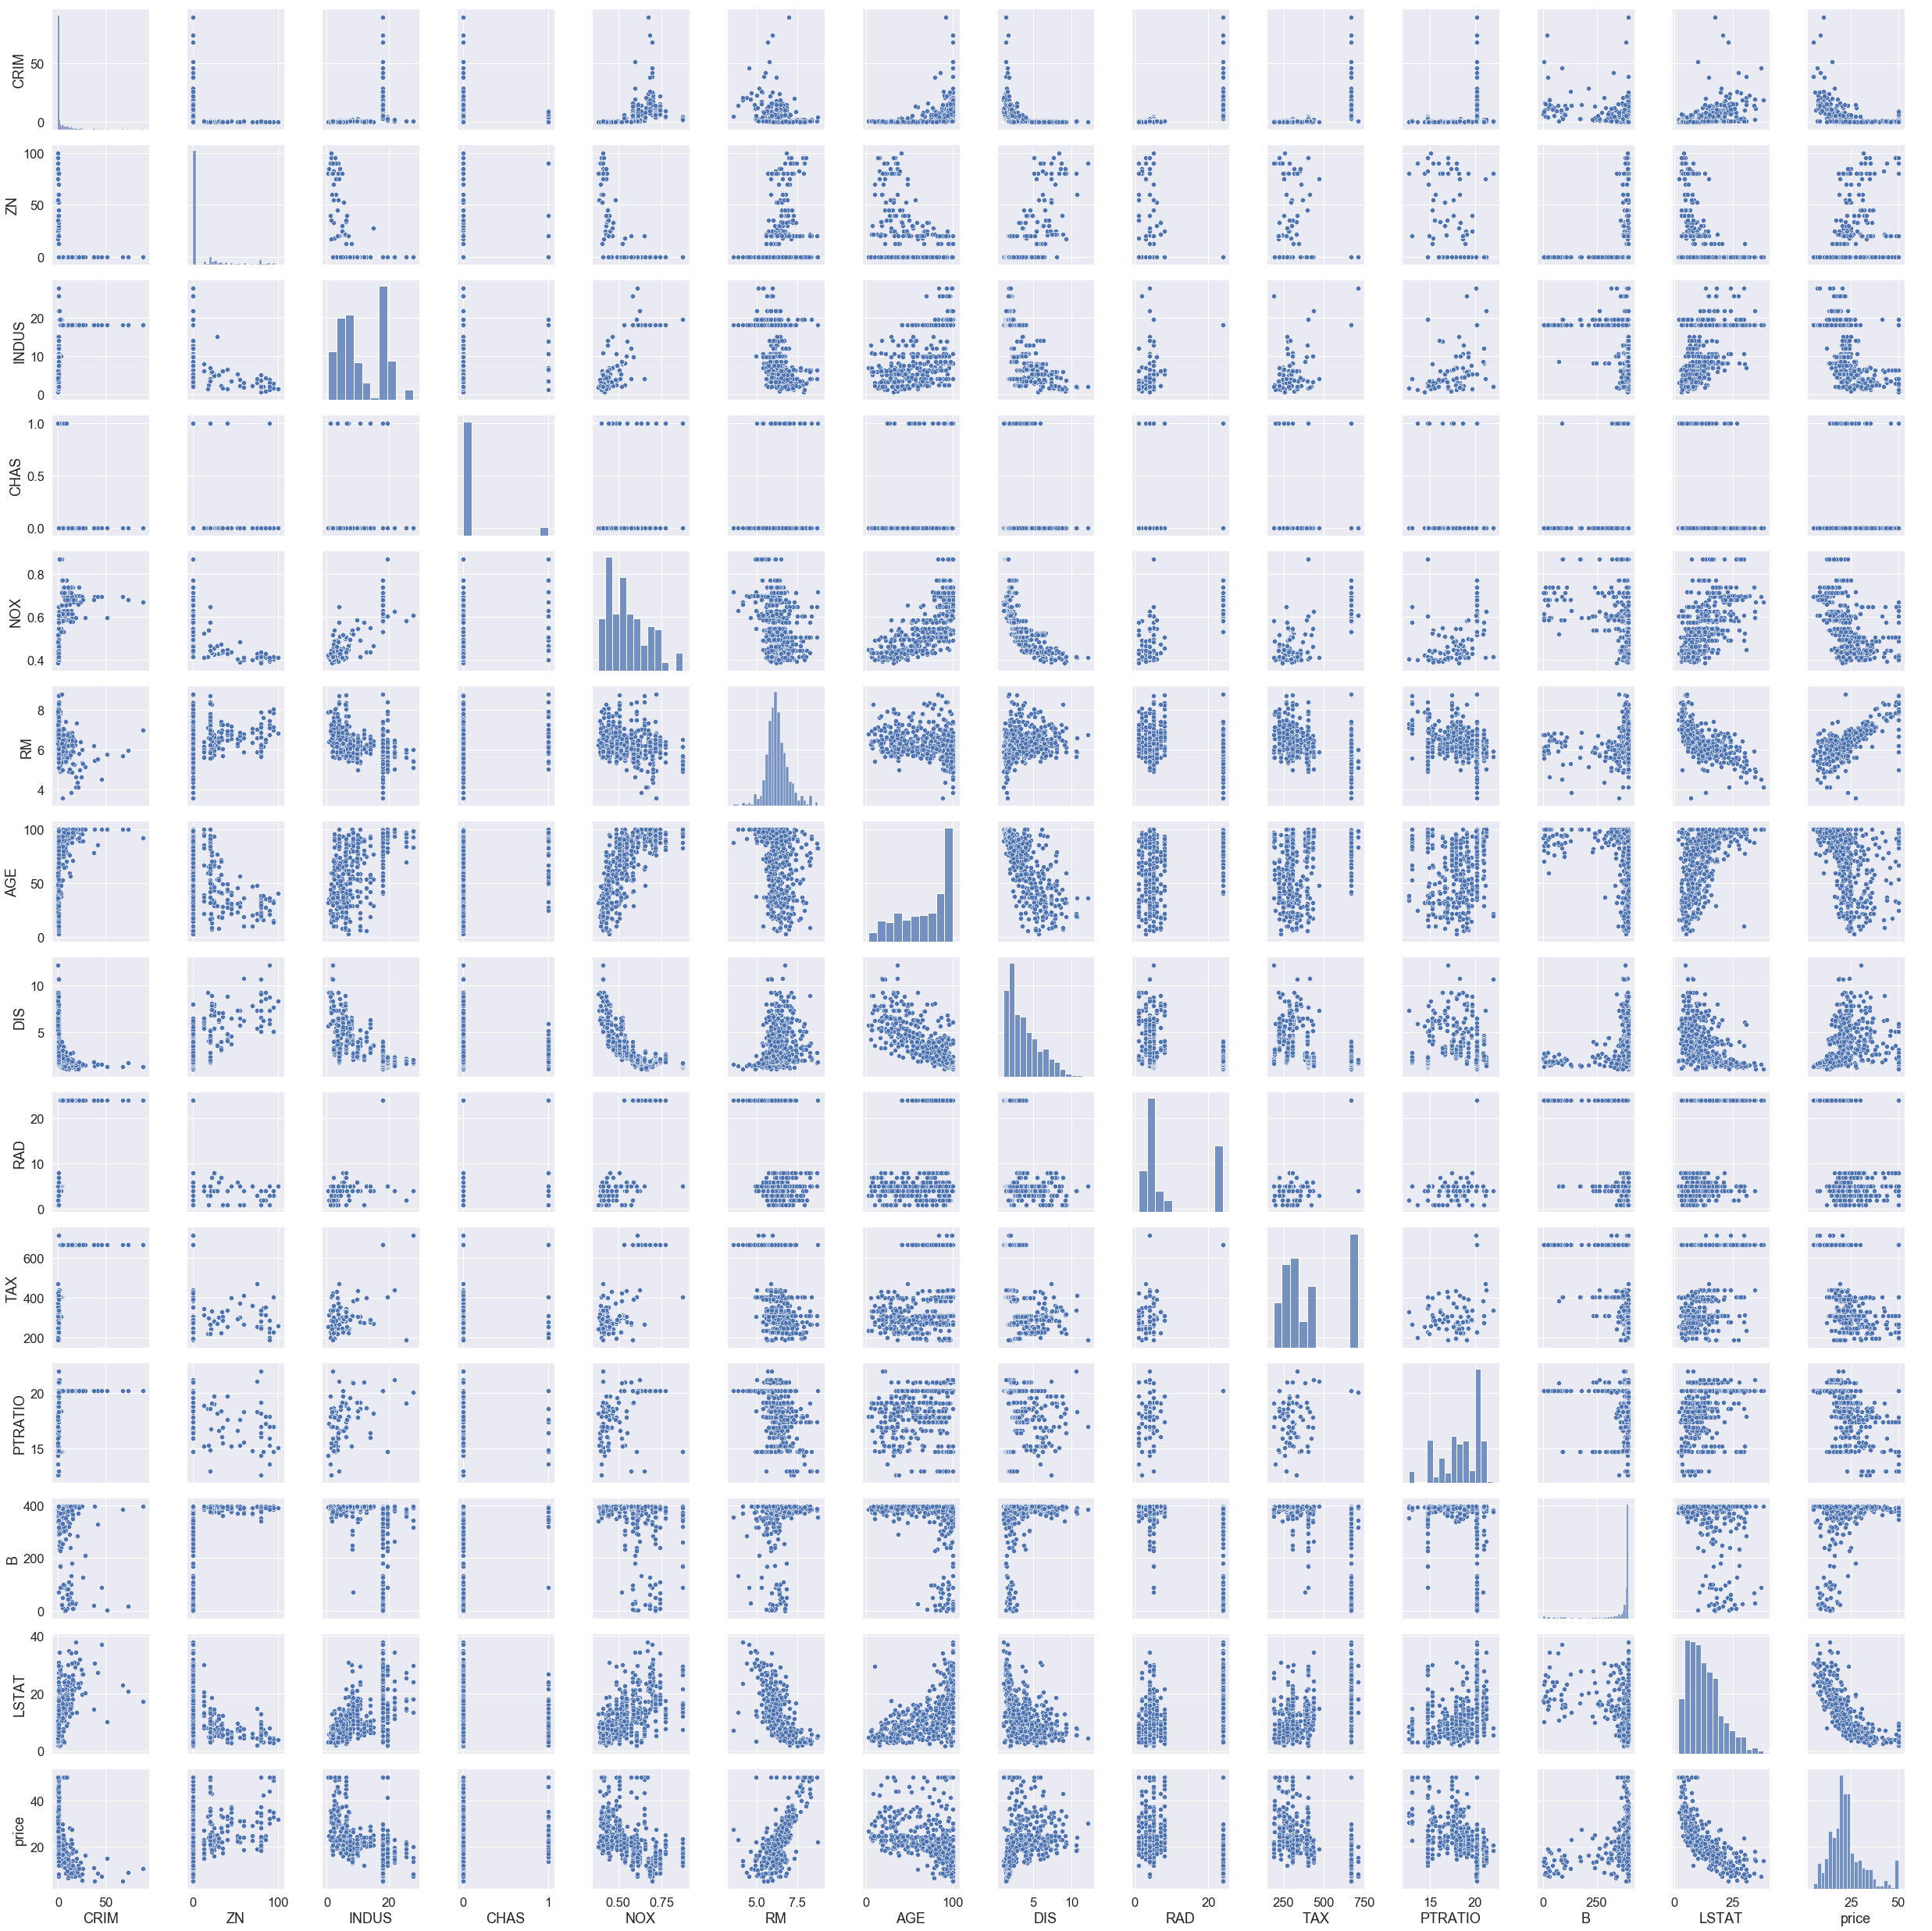

In [15]:
#try several visualization options for exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
sns.pairplot(pdData)

- **CRIM per capita crime rate by town**
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS proportion of non-retail business acres per town**
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- **RM average number of rooms per dwelling**
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- **LSTAT \% lower status of the population**
- price Median value of owner-occupied homes in \$1000’s

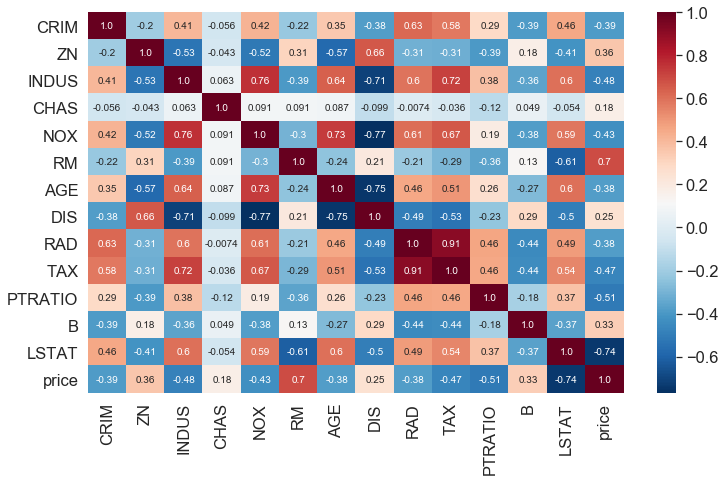

In [13]:
plt.figure(figsize=(12, 7))
sns.heatmap(pdData.corr(), cmap="RdBu_r", annot=True, fmt=".2")

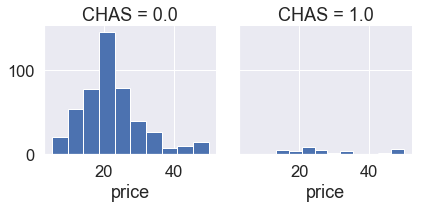

In [17]:
g = sns.FacetGrid(pdData, col="CHAS")# ceteris-paribus check
g.map(plt.hist, "price")

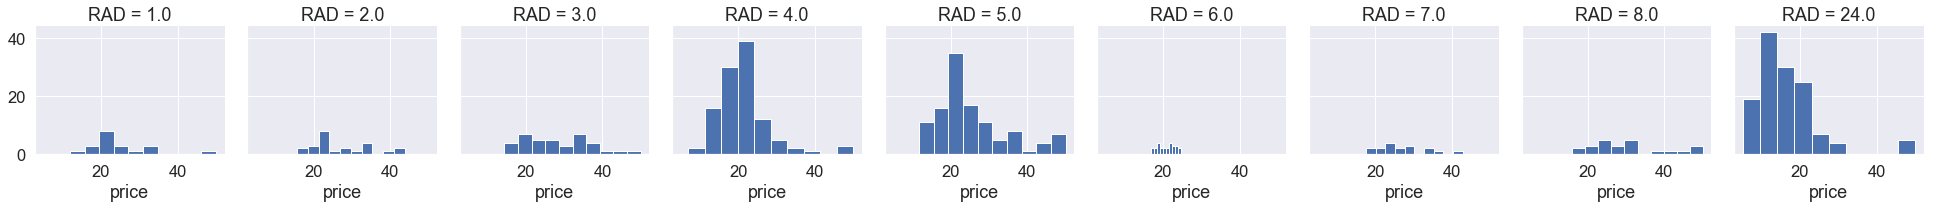

In [48]:
g = sns.FacetGrid(pdData, col="RAD")
g.map(plt.hist, "price")

In [20]:
grouped = pdData.groupby(["RAD","CHAS"])["price"].agg("mean") 
#not very good example, but generally worthwhile
grouped

RAD   CHAS
1.0   0.0     23.015789
      1.0     50.000000
2.0   0.0     26.833333
3.0   0.0     27.927778
      1.0     27.950000
4.0   0.0     21.040196
      1.0     25.812500
5.0   0.0     25.521154
      1.0     27.463636
6.0   0.0     20.976923
7.0   0.0     27.105882
8.0   0.0     31.505263
      1.0     26.000000
24.0  0.0     15.438710
      1.0     31.362500
Name: price, dtype: float64

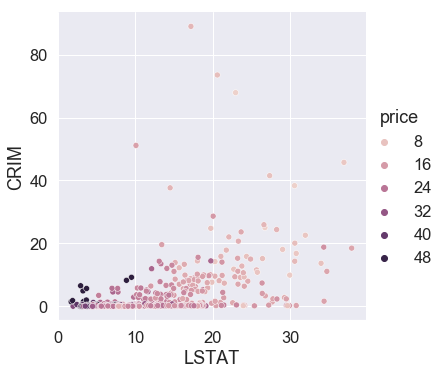

In [21]:
sns.relplot(x="LSTAT", y="CRIM", hue="price", data=pdData);

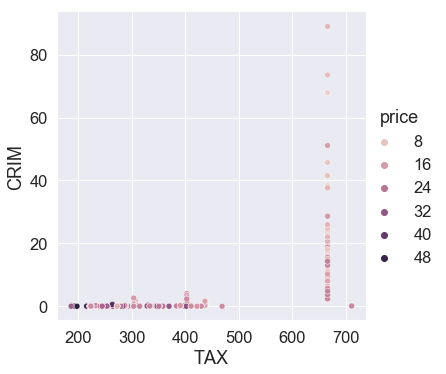

In [23]:
sns.relplot(x="TAX", y="CRIM", hue="price", data=pdData);

In [24]:
import  sklearn.model_selection
y = pdData["price"]
X = pdData.drop("price", axis=1)
(train, test, y, y_test) = sklearn.model_selection.train_test_split(X,y, test_size=0.2)
# basic variant - cross-validation, stratified samples etc. possible if necessary
# do not forget to set random seeds if you plan to report results

In [25]:
train.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
272  0.11460  20.0   6.96   0.0  0.464  6.538  58.7  3.9175  3.0  223.0   
291  0.07886  80.0   4.95   0.0  0.411  7.148  27.7  5.1167  4.0  245.0   
264  0.55007  20.0   3.97   0.0  0.647  7.206  91.6  1.9301  5.0  264.0   
94   0.04294  28.0  15.04   0.0  0.464  6.249  77.3  3.6150  4.0  270.0   
311  0.79041   0.0   9.90   0.0  0.544  6.122  52.8  2.6403  4.0  304.0   

     PTRATIO       B  LSTAT  
272     18.6  394.96   7.73  
291     19.2  396.90   3.56  
264     13.0  387.89   8.10  
94      18.2  396.90  10.59  
311     18.4  396.90   5.98

# Pre-processing
- scaling data
- feature engineering (not explored here)

In [26]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(train)

train_norm = norm.transform(train)
test_norm = norm.transform(test)
# if you plan to compare your data across coumns (e.g. similarity for KNN), you should normalize them!
# variaous normalizations possible
# also empirical conjunctive distribution may be appropriate here to get rid of outliers and for "non equal metric" spaces
# - i.e., is the difference between 10$ and 20$ the same as between $10010 and $10020?

In [27]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
norm.fit(train)

train_scaled = norm.transform(train)
test_scaled = norm.transform(test)

# Simple linear regression

In [28]:
#try simple linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train, y)
y_pred = lr.predict(test)
lr.coef_

array([-1.11813319e-01,  4.24114350e-02,  1.36782601e-03,  2.71496150e+00,
       -1.97837074e+01,  4.23784209e+00,  3.70109895e-04, -1.52418961e+00,
        3.24182875e-01, -1.28666152e-02, -9.89430630e-01,  8.84149748e-03,
       -4.88708900e-01])

In [29]:
# and evaluate its results
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

4.77967657319368

In [30]:
#normalized data
lr = LinearRegression()
lr.fit(train_norm, y)
y_pred = lr.predict(test_norm)
np.sqrt(mean_squared_error(y_test, y_pred))

4.675269871542092

In [32]:
#standardized data
lr = LinearRegression()
lr.fit(train_scaled, y)
y_pred = lr.predict(test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

4.779676573193677

- preprocessing did not affect the results much (it basically does the same as lin. reg.)
- LR is not very good, but compared to the mean value guessing, it is still a bit better

In [33]:
np.sqrt(mean_squared_error([y.mean()]*len(y), y))

9.2895567769008

# Try k-nearest neighbors approach

In [37]:
# try various K on raw data
from sklearn.neighbors import KNeighborsRegressor
for k in range(1,20,2):
    knn = KNeighborsRegressor(n_neighbors=k, weights="distance")
    knn.fit(train, y)
    y_pred = knn.predict(test)
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

6.655382607112744
5.554838660644224
5.446163691386606
5.426142022211384
5.383194498381695
5.404864957878087
5.459856808749539
5.502762530628427
5.583416954866697
5.685738252678367


In [38]:
# normalized data
for k in range(1,20,2):
    knn = KNeighborsRegressor(n_neighbors=k, weights="distance")
    knn.fit(train_norm, y)
    y_pred = knn.predict(test_norm)
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

6.581882441261635
5.4416060288754515
5.202504983407837
4.999779153927203
5.015377094292347
5.153583421412265
5.217365021725819
5.243195345075186
5.3958704939003965
5.4957583712075335


In [39]:
# standardized data
from sklearn.neighbors import KNeighborsRegressor
for k in range(1,20,2):
    knn = KNeighborsRegressor(n_neighbors=k, weights="distance")
    knn.fit(train_scaled, y)
    y_pred = knn.predict(test_scaled)
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

4.520595570688169
4.22406806702115
4.285528442821993
4.545200574948672
4.491454538062868
4.609938873184447
4.598811153638341
4.606626430473275
4.646475547218835
4.7008971274179325


- several variants of the standardized input managed to improve over LR a bit
- hyperparameter selection through validation set encouraged
- still, a lot of noise from irrelevant attributes 

In [45]:
#remove less relevant attributes
#this should have been done based on the analysis of the TRAIN data only
train_reduced = train[['CRIM', 'INDUS',  'NOX', 'RM','TAX', 'PTRATIO', 'LSTAT']]
test_reduced = test[['CRIM', 'INDUS',  'NOX', 'RM','TAX', 'PTRATIO', 'LSTAT']]
norm = StandardScaler()
norm.fit(train_reduced)
train_scaled_reduced = norm.transform(train_reduced)
test_scaled_reduced = norm.transform(test_reduced)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
for k in range(1,20,2):
    knn = KNeighborsRegressor(n_neighbors=k, weights="distance")
    knn.fit(train_scaled_reduced, y)
    y_pred = knn.predict(test_scaled_reduced)
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

3.721730042574813
3.5731782941612646
3.6342870885185365
3.7725933166600942
3.7511037898858843
3.7421728973577064
3.8175964534052627
3.7806191359000656
3.852445907518545
3.931843791757373


- quite a bit better!
- always keep in mind, whether your learning method can deal with noisy attribute itself, or they should be pre-processed
- try e.g. LASSO

### But how the errors actually looks like?

{'whiskers': [<matplotlib.lines.Line2D at 0x156b4d8c748>,
 'caps': [<matplotlib.lines.Line2D at 0x156b4d8ce48>,
 'boxes': [<matplotlib.lines.Line2D at 0x156b4d8c2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x156b4d9c588>],
 'fliers': [<matplotlib.lines.Line2D at 0x156b4d9c908>],
 'means': []}

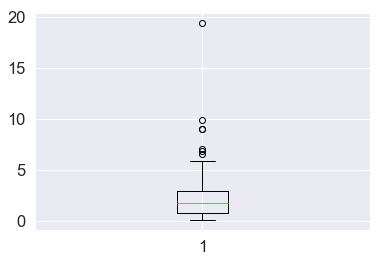

In [47]:
knn = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn.fit(train_scaled_reduced, y)
y_pred = knn.predict(test_scaled_reduced)
err = np.abs(y_test-y_pred)
plt.boxplot(err)

- predictions are mostly quite close, with a few exceptions that bias the mean significantly